#### sklearn.metrics.roc_curve
> sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
* y_score
	> Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

#### sklearn.metrics.roc_auc_score
> sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [2]:
warnings.filterwarnings('ignore')

train_df = pd.read_csv('./datasets/titanic/train.csv')
test_df = pd.read_csv('./datasets/titanic/test.csv')
test_y_df = pd.read_csv('./datasets/titanic/gender_submission.csv')

In [3]:
train = train_df[['Pclass', 'Sex', 'Age', 'Survived']]
test = test_df[['Pclass', 'Sex', 'Age']]
test_y = test_y_df['Survived']

In [4]:
train = train.dropna(axis=0)

In [5]:
# 'Sex' Labelencoding
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])

train['Sex'] = data

In [6]:
# 'Age' Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(train[['Age']])

train['Age'] = data

In [36]:
X = train.drop('Survived', axis=1)
y = train['Survived']

lr = LogisticRegression()

lr.fit(X, y)

LogisticRegression()

In [38]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X, y)
dt_pred_proba = dt.predict_proba(test)
dt_fpr, dt_tpr, dt_threshold = roc_curve(test_y, dt_pred_proba[:, 1])

In [8]:
# test data 전처리
test = test.fillna(np.mean(test['Age']))

# 'Sex' Labelencoding
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])

test['Sex'] = data

# 'Age' Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(test[['Age']])

test['Age'] = data

In [9]:
pred = lr.predict(test)

In [11]:
pred_proba = lr.predict_proba(test)

In [12]:
pred_proba

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633],
       [0.86809473, 0.13190527],
       [0.4815489 , 0.5184511 ],
       [0.741245  , 0.258755  ],
       [0.39847677, 0.60152323],
       [0.88907928, 0.11092072],
       [0.91233877, 0.08766123],
       [0.60968801, 0.39031199],
       [0.06846683, 0.93153317],
       [0.89037219, 0.10962781],
       [0.12625043, 0.87374957],
       [0.19582866, 0.80417134],
       [0.78683182, 0.21316818],
       [0.88907928, 0.11092072],
       [0.46049937, 0.53950063],
       [0.58628643, 0.41371357],
       [0.66807347, 0.33192653],
       [0.85111748, 0.14888252],
       [0.08274279, 0.91725721],
       [0.43582593, 0.56417407],
       [0.12939017, 0.87060983],
       [0.94775495, 0.05224505],
       [0.06669219, 0.93330781],
       [0.89317761, 0.10682239],
       [0.57570754, 0.42429246],
       [0.91233877, 0.08766123],
       [0.

In [16]:
pred_proba_class1 = lr.predict_proba(test)[:, 1]
len(pred_proba_class1)

418

In [17]:
fprs, tprs, thresholds = roc_curve(test_y, pred_proba_class1)

In [18]:
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index: ', thr_index)
print('샘플 index로 추출한 임곗값 : ', np.round(thresholds[thr_index], 2))

샘플 추출을 위한 임곗값 배열의 index:  [  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131]
샘플 index로 추출한 임곗값 :  [0.94 0.92 0.9  0.85 0.83 0.8  0.77 0.65 0.59 0.56 0.54 0.52 0.48 0.46
 0.41 0.38 0.33 0.29 0.26 0.24 0.18 0.14 0.11 0.11 0.1  0.08 0.07]


In [19]:
print('샘플 임곗값별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR : ', np.round(tprs[thr_index], 3))

샘플 임곗값별 FPR :  [0.    0.    0.    0.    0.    0.    0.    0.004 0.008 0.015 0.026 0.034
 0.086 0.09  0.132 0.162 0.203 0.241 0.293 0.368 0.414 0.481 0.538 0.602
 0.68  0.932 0.966]
샘플 임곗값별 TPR :  [0.013 0.092 0.171 0.27  0.349 0.434 0.493 0.566 0.645 0.717 0.757 0.934
 0.941 0.98  0.993 1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.   ]


In [32]:
def roc_curve_plot(y_test, pred_proba_c1):
	fprs, tprs, thresholds = roc_curve(test_y, pred_proba_c1)

	plt.plot(fprs, tprs, label='ROC')
	plt.plot([0, 1], [0, 1], 'k--', label='Random')

	start, end = plt.xlim()
	plt.xticks(np.round(np.arange(start, end, 0.1), 2))
	plt.xlim(0, 1); plt.ylim(0, 1)
	plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
	plt.legend()
	plt.show()
	

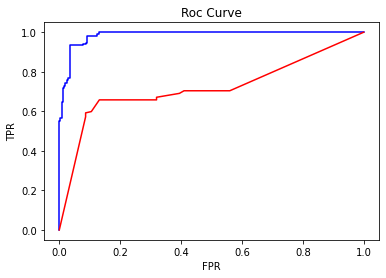

In [42]:
plt.title("Roc Curve")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.plot(fprs, tprs, "b", label = "LogisticRegression")
plt.plot(dt_fpr, dt_tpr, "r", label = "DecisionTree")

plt.show()

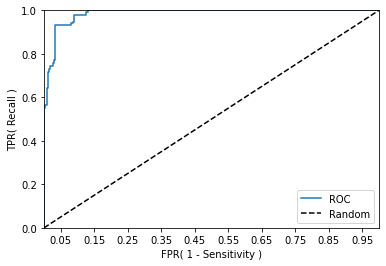

In [41]:
roc_curve_plot(test_y, lr.predict_proba(test)[:, 1])

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
lr_auc = roc_auc_score(test_y, pred_proba[:, 1])
dt_auc = roc_auc_score(test_y, dt_pred_proba[:, 1])

In [47]:
print(lr_auc, dt_auc)

0.9852344677483182 0.7184161060546101


In [50]:
print(f'Logistic Regression AUC : {lr_auc}\nDecisionTree AUC: {dt_auc}')

Logistic Regression AUC : 0.9852344677483182
DecisionTree AUC: 0.7184161060546101
